In [3]:
%pylab inline
from scipy.linalg import cholesky
from density import grid
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
def homogeneous_sphere(n_dots):
    phi = random.rand(n_dots) * 2*pi
    theta = random.rand(n_dots) * 2 - 1
    R = random.rand(n_dots)
    X = R**(1/3.) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.) * theta
    return X, Y, Z

(-1.5, 1.5, -1.5, 1.5)

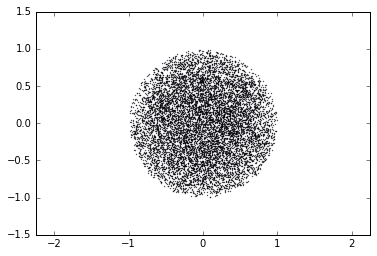

In [5]:
x, y, z = homogeneous_sphere(10000)

scatter(y, z, s=0.1)
axis('equal')

In [6]:
def A_matrix(a, b, c):
    A = np.zeros((3, 3))
    A[0][0] = 1/float(a)**2
    A[1][1] = 1/float(b)**2
    A[2][2] = 1/float(c)**2
    return A

In [7]:
def B_matrix(A):
    B = cholesky(A, lower=True)
    return B, B.T
    

In [8]:
A_t = A_matrix(1.25, 1, 1)
b, b_t = B_matrix(A_t)

In [9]:
def ellipse_gen(xyz, a, b, c):
    A = A_matrix(a, b, c)
    B, B_t = B_matrix(A)
    xyz_ellipse = np.zeros((len(xyz),3))
    for i in range(len(xyz)):
        xyz_ellipse[i] = np.dot(inv(B_t),xyz[i])
    return xyz_ellipse

In [10]:
xyz = np.zeros((10000, 3))
xyz[:,0] = x
xyz[:,1] = y
xyz[:,2] = z

In [11]:
xyz_ellipse = ellipse_gen(xyz, 1.25, 1, 1)

(-1.5, 1.5, -1.5, 1.5)

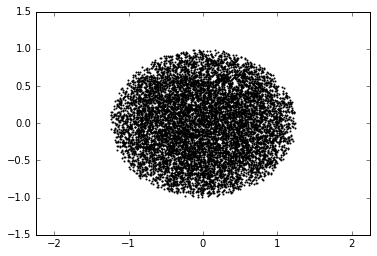

In [12]:
scatter(xyz_ellipse[:,0], xyz_ellipse[:,2], s=1)
axis('equal')

In [13]:
## writting this test data

f = open('ellipse.dat', 'w')
for i in range(len(xyz)):
    f.write('%f %f %f \n'%(xyz_ellipse[i,0], xyz_ellipse[i,1], xyz_ellipse[i,2]))
f.close()

In [14]:
rho = grid(xyz_ellipse[:,0], xyz_ellipse[:,1], xyz_ellipse[:,2], 100)

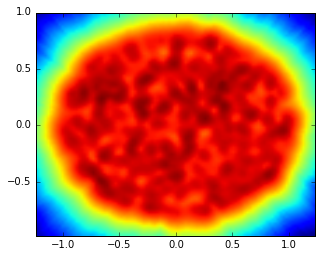

In [15]:
imshow(log10(rho.T), origin='lower', 
       extent=[min(xyz_ellipse[:,0]), max(xyz_ellipse[:,0]), 
               min(xyz_ellipse[:,1]), max(xyz_ellipse[:,1])])

In [21]:
real_halo = readsnap('../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
real_halo_ids = readsnap('../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Particle IDs


In [28]:
id_cut = np.sort(real_halo_ids)[1000000]
index_mw = np.where(real_halo_ids<id_cut)[0]
print id_cut
x = real_halo[index_mw,0]
y = real_halo[index_mw,1]
z = real_halo[index_mw,2]
mw_coords = np.zeros((len(x),3))
mw_coords[:,0] = x
mw_coords[:,1] = y
mw_coords[:,2] = z

print len(x)

1600001
1000000


(-100000.0, 100000.0, -100000.0, 100000.0)

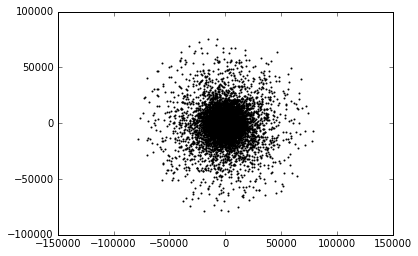

In [29]:
scatter(x, y, s=1)
axis('equal')

In [32]:
ellips_halo = ellipse_gen(mw_coords, 2., 1, 1)

(-200000.0, 200000.0, -100000.0, 100000.0)

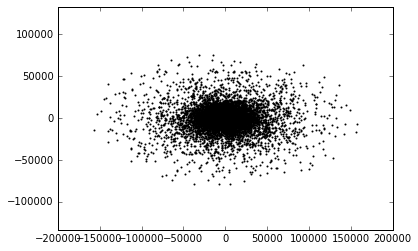

In [33]:
scatter(ellips_halo[:,0], ellips_halo[:,1], s=1)
axis('equal')

In [ ]:
rho = grid(ellips_halo[:,0], ellips_halo[:,1], ellips_halo[:,2], 100)

In [35]:
f = open('ellipse.dat', 'w')
for i in range(len(ellips_halo)):
    f.write('%f %f %f \n'%(ellips_halo[i,0], ellips_halo[i,1], ellips_halo[i,2]))
f.close()

In [19]:
print len(ellips_halo)

1500000


In [ ]:
figure(figsize=(16, 6))
subplot(1, 2, 1)
imshow(log10(rho.T), origin='lower', 
       extent=[min(ellips_halo[:,0]), max(ellips_halo[:,0]), 
               min(ellips_halo[:,1]), max(ellips_halo[:,1])])

## references:

 
    
- sec 2.5.5 of: http://onlinelibrary.wiley.com/book/10.1002/9780470230381;jsessionid=BA9E71D3879A6C94AAD91FC044CA74B1.f02t02

- https://www.quantstart.com/articles/Cholesky-Decomposition-in-Python-and-NumPy

- http://www.math.washington.edu/~king/coursedir/m308a01/Projects/m308a01-pdf/brown.pdf
